<a href="https://colab.research.google.com/github/MJ7869/Netflix-Movies-and-TV-Shows-Analysis/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
file=files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Attempt to read with 'latin-1' encoding
try:
    df = pd.read_csv('netflix_titles.csv', encoding='latin-1')
    print("File read successfully with 'latin-1' encoding")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")


File read successfully with 'latin-1' encoding


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [6]:
df=df.drop(columns=[col for col in df.columns if "Unnamed" in col])    #drop all the unnamed columns from 12 to 25

In [7]:
df.info()            #to verify that only intended columns removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [8]:
df.isna().sum()         #display the total NA values in each column

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [11]:
#convert the date_added column to datetime data type
df["date_added"]=pd.to_datetime(df["date_added"], format='%B %d, %Y', errors="coerce")
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5334 non-null   object        
 1   type          5334 non-null   object        
 2   title         5334 non-null   object        
 3   director      5334 non-null   object        
 4   cast          5334 non-null   object        
 5   country       5334 non-null   object        
 6   date_added    5330 non-null   datetime64[ns]
 7   release_year  5334 non-null   int64         
 8   rating        5334 non-null   object        
 9   duration      5334 non-null   object        
 10  listed_in     5334 non-null   object        
 11  description   5334 non-null   object        
 12  year          5330 non-null   float64       
 13  month         5330 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 583.5+ KB


In [13]:
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5334 non-null   object        
 1   type          5334 non-null   object        
 2   title         5334 non-null   object        
 3   director      5334 non-null   object        
 4   cast          5334 non-null   object        
 5   country       5334 non-null   object        
 6   date_added    5330 non-null   datetime64[ns]
 7   release_year  5334 non-null   int64         
 8   rating        5334 non-null   object        
 9   duration      5334 non-null   object        
 10  listed_in     5334 non-null   object        
 11  description   5334 non-null   object        
 12  year          5330 non-null   float64       
 13  month         5330 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 583.5+ KB


In [14]:
df["date_added"].isna().sum()
df.dropna(inplace=True)

In [15]:
df.reset_index(drop=True)
df=df.drop(columns=["date_added"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5330 entries, 0 to 5333
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5330 non-null   object 
 1   type          5330 non-null   object 
 2   title         5330 non-null   object 
 3   director      5330 non-null   object 
 4   cast          5330 non-null   object 
 5   country       5330 non-null   object 
 6   release_year  5330 non-null   int64  
 7   rating        5330 non-null   object 
 8   duration      5330 non-null   object 
 9   listed_in     5330 non-null   object 
 10  description   5330 non-null   object 
 11  year          5330 non-null   float64
 12  month         5330 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 583.0+ KB


In [16]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...","Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0


In [18]:
#Display the counts of TV Shows and Movies in the dataset after data cleaning
types=df["type"].value_counts().reset_index()
types

,type,count
0,Movie,5186
1,TV Show,144


[]

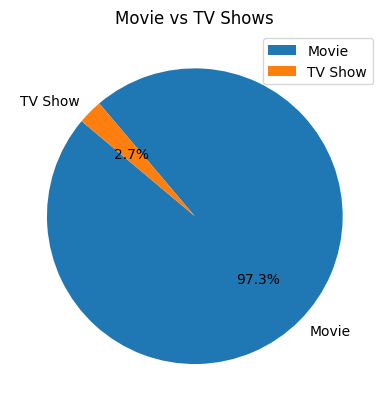

In [19]:
#Pie chart for the distribution of the Movie vs TV Show
def absolute_value(val):
    a = int(val/100.*sum(types['count']))
    return f'{a}'

plt.pie(types["count"],labels=types["type"], autopct="%1.1f%%", startangle=140)
plt.title("Movie vs TV Shows")
plt.legend()
plt.plot()

In [ ]:
#Top 10 directors including both Movies and TV Shows
directors=df.groupby(["director", "type"])["director"].count().reset_index(name="count")

top_10_directors=directors.sort_values(by="count", ascending=False).iloc[0:10]

top_10_directors=top_10_directors.reset_index()
top_10_directors

,index,director,type,count
0,3004,"RaÃºl Campos, Jan Suter",Movie,18
1,1563,Jay Karas,Movie,14
2,2263,Marcus Raboy,Movie,14
3,599,Cathy Garcia-Molina,Movie,13
4,3918,Youssef Chahine,Movie,12
5,2326,Martin Scorsese,Movie,12
6,1560,Jay Chapman,Movie,12
7,3516,Steven Spielberg,Movie,11
8,970,Don Michael Paul,Movie,10
9,853,David Dhawan,Movie,9


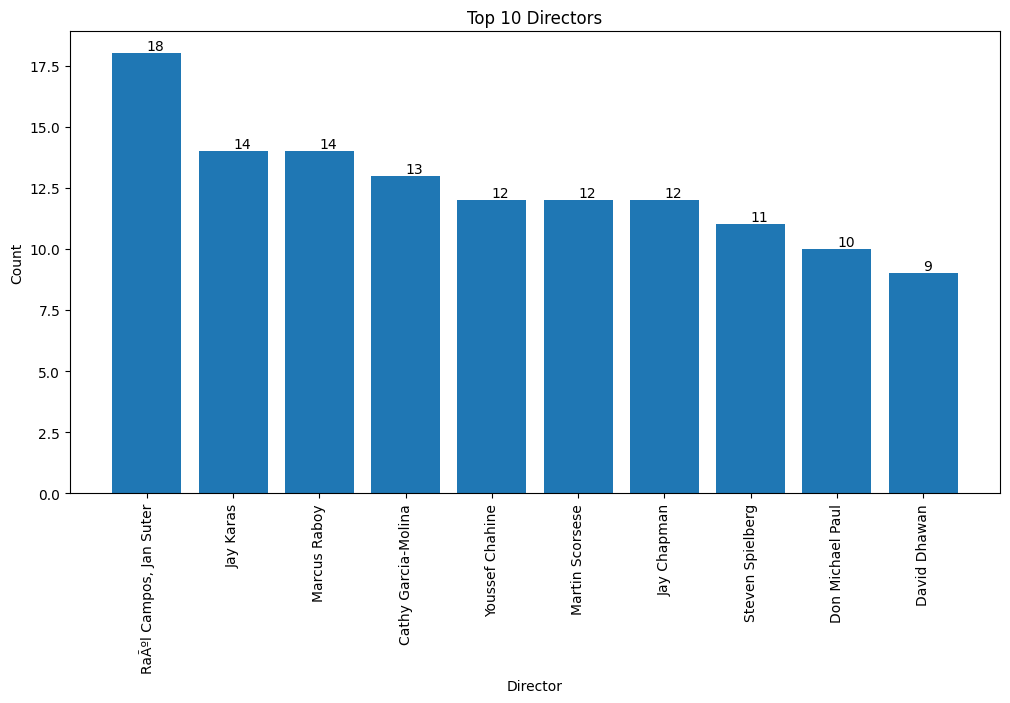

In [ ]:
#Bar graph to plot top 10 directors including both Movies and TV Shows
plt.figure(figsize=(12,6))
bars=plt.bar(top_10_directors["director"], top_10_directors["count"],)
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title("Top 10 Directors")
for bar in bars:                #Add numbers on top of bars
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment
plt.show()

In [20]:
# Creating a new dataframe 'countries' to store the count of each country by type
countries=df.groupby(["country", "type"])["country"].value_counts().reset_index()
countries

,country,type,count
0,", France, Algeria",Movie,1
1,Argentina,Movie,34
2,Argentina,TV Show,1
3,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
4,"Argentina, Chile",Movie,2
...,...,...,...
632,"Uruguay, Guatemala",Movie,1
633,"Uruguay, Spain, Mexico",Movie,1
634,Venezuela,Movie,1
635,Vietnam,Movie,7


In [21]:
# top 10 countries where movies or tv shows made
top_10_countries=countries.sort_values(by="count", ascending=False).iloc[0:10]
top_10_countries

,country,type,count
520,United States,Movie,1820
204,India,Movie,868
438,United Kingdom,Movie,164
47,Canada,Movie,104
120,Egypt,Movie,90
308,Nigeria,Movie,84
379,Spain,Movie,84
226,Indonesia,Movie,76
425,Turkey,Movie,74
325,Philippines,Movie,73


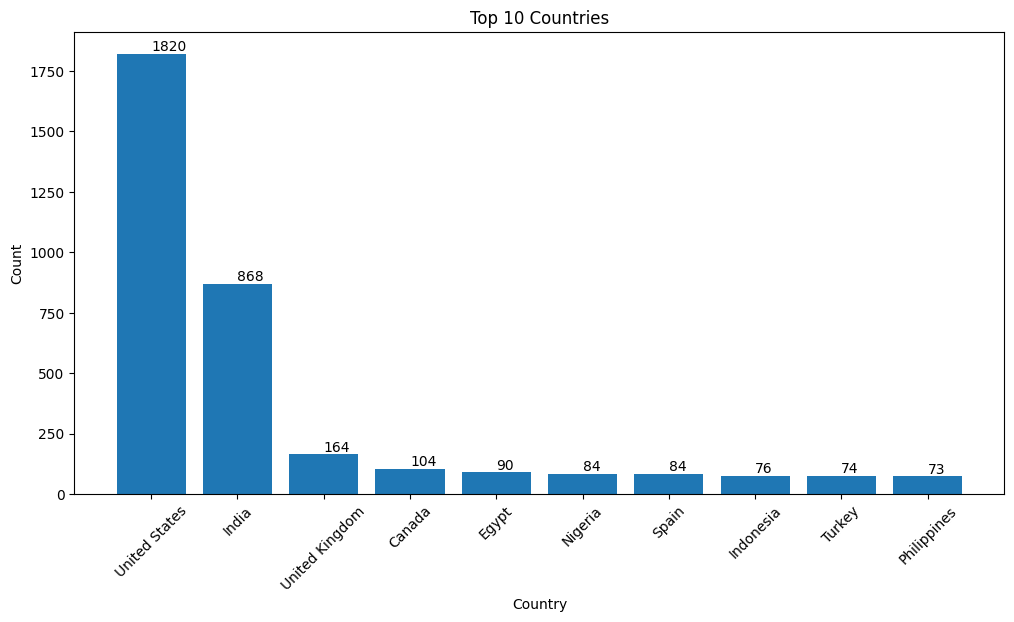

In [22]:
# Plotting bar graph to show the top 10 countries
plt.figure(figsize=(12,6))
bars=plt.bar(top_10_countries["country"], top_10_countries["count"],)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title("Top 10 Countries")
for bar in bars:                #Add numbers on top of bars
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment
plt.show()

In [23]:
# top 10 countries where movies are made
top_10_movies_countries=countries[countries["type"] == "Movie"].sort_values(by="count",ascending=False).iloc[0:10]
top_10_movies_countries

,country,type,count
520,United States,Movie,1820
204,India,Movie,868
438,United Kingdom,Movie,164
47,Canada,Movie,104
120,Egypt,Movie,90
379,Spain,Movie,84
308,Nigeria,Movie,84
226,Indonesia,Movie,76
425,Turkey,Movie,74
266,Japan,Movie,73


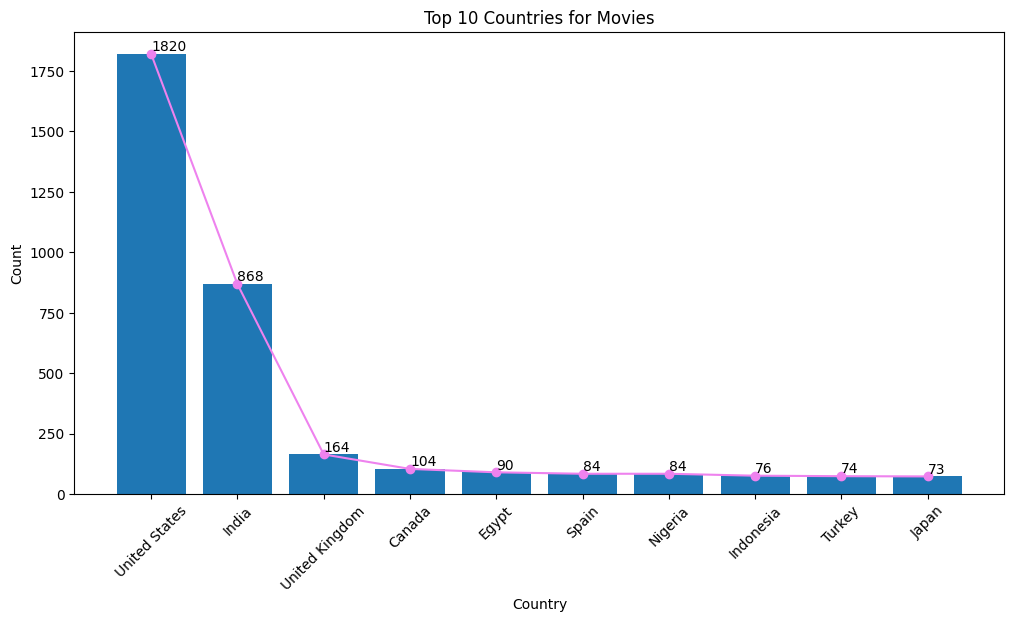

In [32]:
# Plotting bar graph to show the top 10 countries where movies are made
plt.figure(figsize=(12,6))
plt.plot(top_10_movies_countries['country'], top_10_movies_countries['count'], marker='o', label='TV Shows', color='violet')

bars=plt.bar(top_10_movies_countries["country"], top_10_movies_countries["count"])
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title("Top 10 Countries for Movies")
for bar in bars:                #Add numbers on top of bars
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment
plt.show()

In [24]:
# top 10 countries where tv shows are made
top_10_tv_countries=countries[countries["type"] == "TV Show"].sort_values(by="count", ascending=False).iloc[0:10]
top_10_tv_countries

,country,type,count
521,United States,TV Show,25
439,United Kingdom,TV Show,18
372,South Korea,TV Show,10
267,Japan,TV Show,10
205,India,TV Show,7
380,Spain,TV Show,7
416,Taiwan,TV Show,7
128,France,TV Show,5
421,Thailand,TV Show,5
426,Turkey,TV Show,5


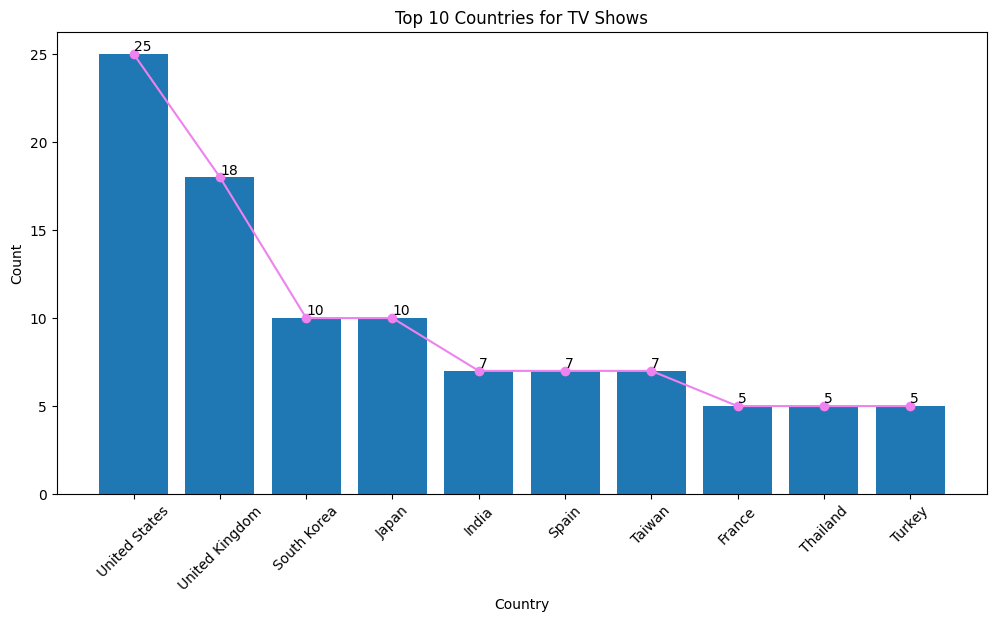

In [31]:
# Plotting bar graph to show the top 10 countries where tv shows are made
plt.figure(figsize=(12,6))
plt.plot(top_10_tv_countries['country'], top_10_tv_countries['count'], marker='o', label='TV Shows', color='violet')

bars=plt.bar(top_10_tv_countries["country"], top_10_tv_countries["count"])
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title("Top 10 Countries for TV Shows")
for bar in bars:                #Add numbers on top of bars
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment
plt.show()

In [35]:
#To show the number of tv shows and movies released over the years
import plotly.express as px
release_years = df.groupby(['release_year', 'type'])['release_year'].value_counts().reset_index()
release_years

fig=px.bar(release_years,y='count',x='release_year',title='Year On Year Show Added On Netflix',color='type')
fig.show()

In [36]:
#Top 10 years where movies released where maximum
top_10_movies_years = release_years[release_years['type'] == 'Movie'].sort_values(by= 'count', ascending=False).iloc[0:10]
top_10_movies_years

,release_year,type,count
77,2017,Movie,640
79,2018,Movie,632
75,2016,Movie,567
81,2019,Movie,495
83,2020,Movie,409
73,2015,Movie,340
71,2014,Movie,235
69,2013,Movie,195
67,2012,Movie,159
85,2021,Movie,146


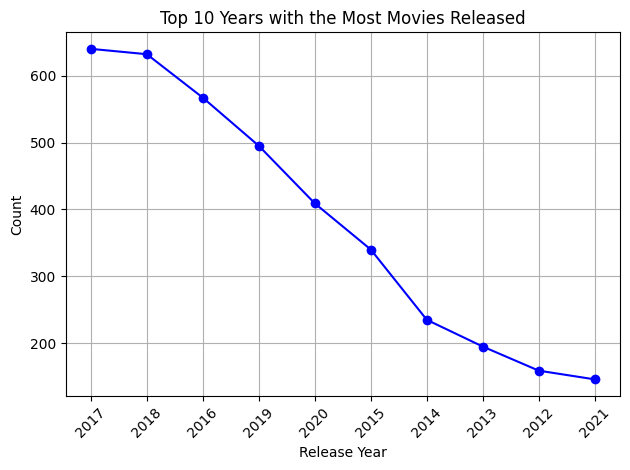

In [37]:
# Plotting line graph to show the top 10 years where movies released maximum
plt.plot(top_10_movies_years['release_year'].astype(str), top_10_movies_years['count'], marker='o', linestyle='-', color='b')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 10 Years with the Most Movies Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
#Top 10 years where tv shows released where maximum
top_10_tv_years = release_years[release_years['type'] == 'TV Show'].sort_values(by= 'count', ascending=False).iloc[0:10]
top_10_tv_years

,release_year,type,count
84,2020,TV Show,33
82,2019,TV Show,24
78,2017,TV Show,15
80,2018,TV Show,15
86,2021,TV Show,15
74,2015,TV Show,9
76,2016,TV Show,9
72,2014,TV Show,8
68,2012,TV Show,4
59,2006,TV Show,3


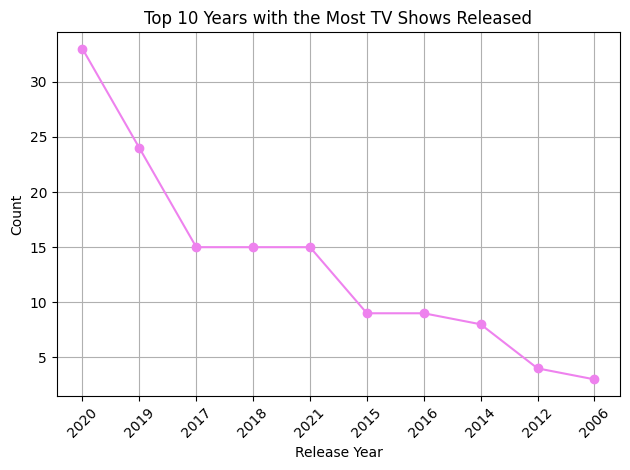

In [39]:
# Plotting line graph to show the top 10 years where tv shows released maximum
plt.plot(top_10_tv_years['release_year'].astype(str), top_10_tv_years['count'], marker='o', linestyle='-', color='violet')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 10 Years with the Most TV Shows Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
# Creating a new dataframe 'ratings' to store the count of each ratings by type
ratings=df.groupby(["rating", "type"])["rating"].value_counts().reset_index()
ratings

#Plot the ratings in the nextflix
fig=px.bar(ratings,y='count',x='rating',title='Ratings in the Netflix',color='type')
fig.show()

In [42]:
# top 10 ratings for movies
top_10_movie_ratings=ratings[ratings["type"]=="Movie"].sort_values(by="count", ascending=False).iloc[0:10]
top_10_movie_ratings

,rating,type,count
11,TV-MA,Movie,1741
7,TV-14,Movie,1177
6,R,Movie,778
5,PG-13,Movie,470
13,TV-PG,Movie,416
4,PG,Movie,275
9,TV-G,Movie,81
15,TV-Y,Movie,71
17,TV-Y7,Movie,70
3,NR,Movie,58


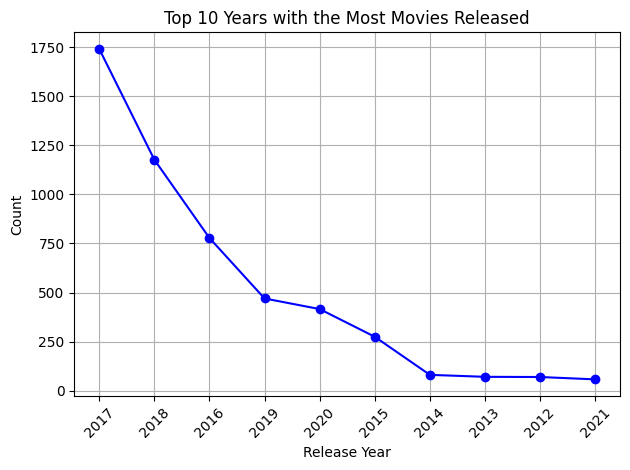

In [44]:
# Plotting line graph to show the top 10 ratings of the movies
plt.plot(top_10_movies_years['release_year'].astype(str), top_10_movie_ratings['count'], marker='o', linestyle='-', color='b')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 10 Years with the Most Movies Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# top 10 ratings for tv shows
top_10_tv_ratings=ratings[ratings["type"]=="TV Show"].sort_values(by="count", ascending=False).iloc[0:10]
top_10_tv_ratings

,rating,type,count
12,TV-MA,TV Show,82
8,TV-14,TV Show,36
14,TV-PG,TV Show,12
18,TV-Y7,TV Show,6
16,TV-Y,TV Show,5
10,TV-G,TV Show,3


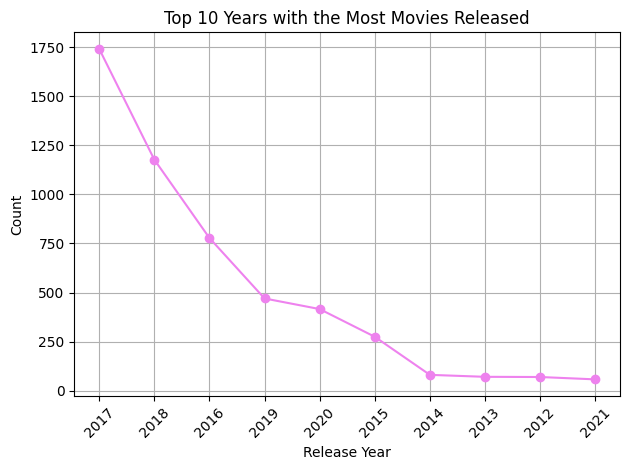

In [46]:
# Plotting line graph to show the top 10 ratings of the tv shows
plt.plot(top_10_movies_years['release_year'].astype(str), top_10_movie_ratings['count'], marker='o', linestyle='-', color='violet')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Top 10 Years with the Most Movies Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
# Creating a new dataframe 'genre' to store the count of each ratings by type
genre=df.groupby(["listed_in", "type"])["listed_in"].value_counts().reset_index()
genre

,listed_in,type,count
0,Action & Adventure,Movie,127
1,"Action & Adventure, Anime Features, Children &...",Movie,4
2,"Action & Adventure, Anime Features, Classic Mo...",Movie,1
3,"Action & Adventure, Anime Features, Horror Movies",Movie,1
4,"Action & Adventure, Anime Features, Internatio...",Movie,33
...,...,...,...
330,TV Comedies,TV Show,2
331,TV Dramas,TV Show,1
332,"TV Horror, TV Mysteries, TV Thrillers",TV Show,1
333,TV Shows,TV Show,5


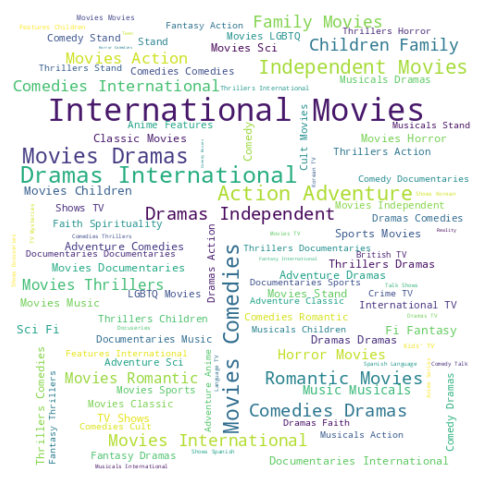

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['listed_in'])
wordcloud=WordCloud(width=500, height=500, background_color="white").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
# top 10 genres for movies
top_10_movie_genre=genre[genre["type"]=="Movie"].sort_values(by="count", ascending=False).iloc[0:10]
top_10_movie_genre

,listed_in,type,count
245,"Dramas, International Movies",Movie,336
326,Stand-Up Comedy,Movie,286
159,"Comedies, Dramas, International Movies",Movie,257
238,"Dramas, Independent Movies, International Movies",Movie,243
97,"Children & Family Movies, Comedies",Movie,179
248,"Dramas, International Movies, Romantic Movies",Movie,160
210,Documentaries,Movie,156
176,"Comedies, International Movies",Movie,152
179,"Comedies, International Movies, Romantic Movies",Movie,143
228,Dramas,Movie,133


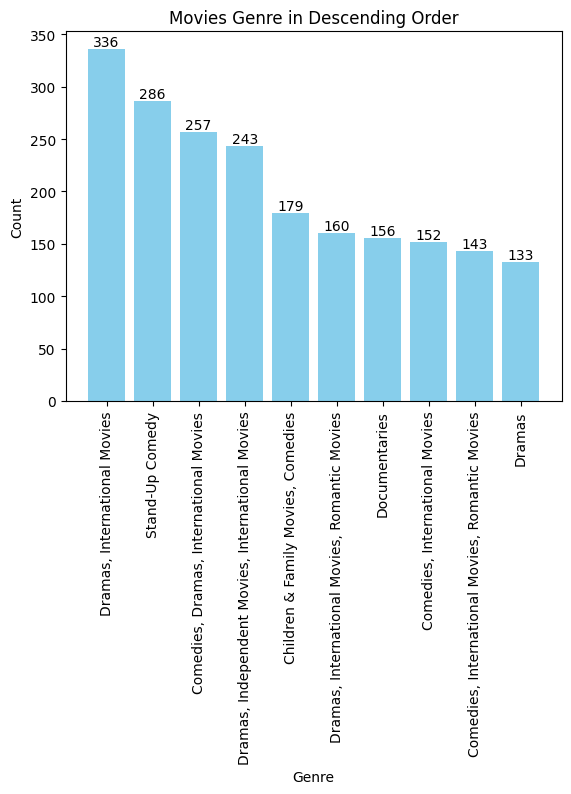

In [72]:
# Plotting the bar graph
bars = plt.bar(top_10_movie_genre['listed_in'], top_10_movie_genre['count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Movies Genre in Descending Order')

# Adding numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

In [51]:
# top 10 genres for tv shows
top_10_tv_genre=genre[genre["type"]=="TV Show"].sort_values(by="count", ascending=False).iloc[0:10]
top_10_tv_genre

,listed_in,type,count
196,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,17
328,"Stand-Up Comedy & Talk Shows, TV Comedies",TV Show,6
306,"International TV Shows, TV Dramas",TV Show,6
299,"International TV Shows, Romantic TV Shows, TV ...",TV Show,6
333,TV Shows,TV Show,5
314,"Kids' TV, TV Comedies",TV Show,5
74,"Anime Series, International TV Shows",TV Show,5
293,"International TV Shows, Korean TV Shows, Roman...",TV Show,5
225,Docuseries,TV Show,4
312,Kids' TV,TV Show,4


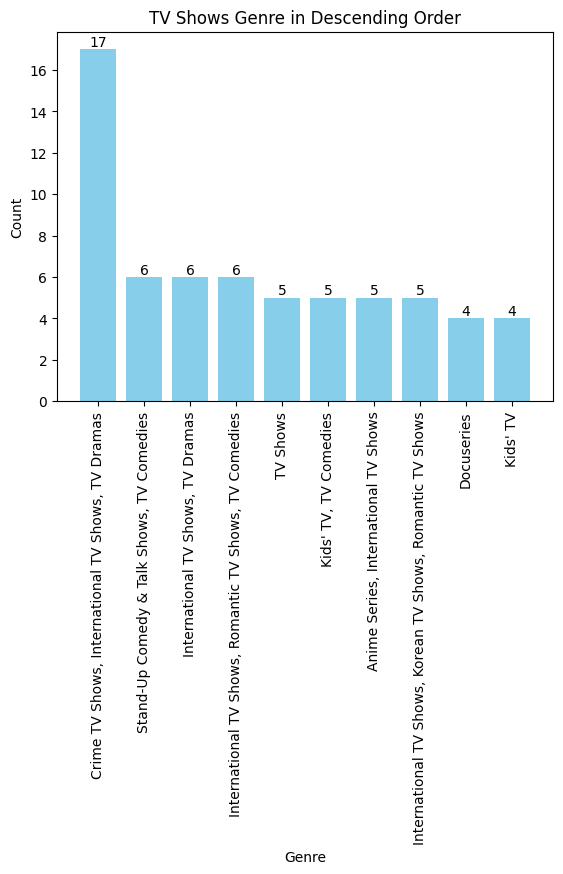

In [71]:
# Plotting the bar graph
bars = plt.bar(top_10_tv_genre['listed_in'], top_10_tv_genre['count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('TV Shows Genre in Descending Order')

# Adding numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

In [74]:
#Jitendra Kumar Shows On Netflix

for index,row in df.iterrows():
    if 'Jitendra Kumar' in row['cast']:
        print(row['type'],'||',row['title'],'||',row['director'],'||',row['cast'],'||',row['country'],'||',row['release_year'],'\n')

Movie || Chaman Bahaar || Apurva Dhar Badgaiyann || Jitendra Kumar, Ritika Badiani, Yogendra Tikku, Bhuvan Arora, Alam Khan, Dhirendra Tiwari, Ashwani Kumar, Bhagwan Tiwari || India || 2020 



In [75]:
#Ayushmann Khurrana Shows On Netflix

for index,row in df.iterrows():
    if 'Ayushmann Khurrana' in row['cast']:
        print(row['type'],'||',row['title'],'||',row['director'],'||',row['cast'],'||',row['country'],'||',row['release_year'],'\n')

Movie || Hawaizaada || Vibhu Virender Puri || Ayushmann Khurrana, Mithun Chakraborty, Pallavi Sharda, Naman Jain, Jameel Khan || India || 2015 

Movie || Article 15 || Anubhav Sinha || Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud Mishra, Isha Talwar, Sayani Gupta, Mohammed Zeeshan Ayyub, Subhrajyoti Barat, Sushil Pandey, Aakash Dabhade || India || 2019 

Movie || Andhadhun || Sriram Raghavan || Tabu, Ayushmann Khurrana, Radhika Apte, Anil Dhawan, Manav Vij, Zakir Hussain, Ashwini Kalsekar, Chhaya Kadam, Pawan Singh, Kabir Sajid || India || 2018 

Movie || Bareilly Ki Barfi || Ashwiny Iyer Tiwari || Ayushmann Khurrana, Kriti Sanon, Rajkummar Rao, Pankaj Tripathi, Seema Pahwa, Rohit Chaudhury, Swati Semwal || India || 2017 



In [76]:
#Pankaj Tripathi Shows On Netflix

for index,row in df.iterrows():
    if 'Pankaj Tripathi' in row['cast']:
        print(row['type'],'||',row['title'],'||',row['director'],'||',row['cast'],'||',row['country'],'||',row['release_year'],'\n')

Movie || Gurgaon || Shanker Raman || Akshay Oberoi, Pankaj Tripathi, Ragini Khanna, Aamir Bashir, Shalini Vatsa, Ashish Verma || India || 2017 

Movie || Ludo || Anurag Basu || Abhishek Bachchan, Aditya Roy Kapur, Rajkummar Rao, Sanya Malhotra, Fatima Sana Shaikh, Pankaj Tripathi, Rohit Saraf, Shalini Vatsa, Pearle Maaney || India || 2020 

Movie || Gunjan Saxena: The Kargil Girl || Sharan Sharma || Janhvi Kapoor, Pankaj Tripathi, Angad Bedi, Viineet Kumar, Manav Vij, Ayesha Raza Mishra || India || 2020 

Movie || Fukrey || Mrighdeep Singh Lamba || Pulkit Samrat, Manjot Singh, Ali Fazal, Varun Sharma, Richa Chadda, Priya Anand, Vishakha Singh, Pankaj Tripathi || India || 2013 

Movie || Drive || Tarun Mansukhani || Jacqueline Fernandez, Sushant Singh Rajput, Boman Irani, Pankaj Tripathi, Vikramjeet Virk, Sapna Pabbi, Vibha Chhibber, Kaustubh Kumar || India || 2019 

Movie || Luka Chuppi || Laxman Utekar || Kartik Aaryan, Kriti Sanon, Pankaj Tripathi, Vinay Pathak, Aparshakti Khurana, A

In [77]:
#Comedy Shows On Netflix In India

for index,row in df.iterrows():
    if 'Comedy' in row['listed_in']:
        if 'India' in row['country']:
            print(row['type'],'||',row['title'],'||',row['director'],'||',row['cast'],'||',row['country'],'||',row['release_year'],'\n')

Movie || Vir Das: Outside In - The Lockdown Special || Vir Das || Vir Das || India || 2020 

Movie || Kenny Sebastian: The Most Interesting Person in the Room || Angshuman Ghosh || Kenny Sebastian || India || 2020 

Movie || Yours Sincerely, Kanan Gill || Neville Shah || Kanan Gill || India || 2020 

Movie || Vir Das: For India || Vir Das, Ajay Bhuyan || Vir Das || India || 2020 

Movie || Aditi Mittal: Things They Wouldn't Let Me Say || Fazila Allana || Aditi Mittal || India || 2017 



In [78]:
#Thriller Shows On Netflix In India Release In Year 2018 or 2019

for index, row in df.iterrows():
  if "Thriller" in row["listed_in"]:
    if "India" in row["country"]:
      if (row["release_year"]==2018 or row["release_year"]==2019):
        print(row['type'],'||',row['title'],'||',row['director'],'||',row['cast'],'||',row['country'],'||',row['release_year'],'\n')

Movie || Aapla Manus || Satish Rajwade || Nana Patekar, Sumeet Raghvan, Iravati Harshe, Aashish Kulkarni, Savita Malpekar || India || 2018 

Movie || Kolaiyuthir Kaalam || Chakri Toleti || Nayanthara, Bhoomika Chawla, Prem Kathir, Rohini Hattangadi, Pratap Pothen, Julian Freund || India || 2019 

Movie || Bypass Road || Naman Nitin Mukesh || Neil Nitin Mukesh, Adah Sharma, Rajit Kapoor, Gul Panag, Shama Sikander, Manish Chaudhary, Sudhanshu Pandey, Taher Shabbir || India || 2019 

Movie || The Body || Jeethu Joseph || Rishi Kapoor, Emraan Hashmi, Sobhita Dhulipala, Vedika, Anupam Bhattacharya, Chandan Anand, Arif Zakaria, Rukhsar Ahmed || India || 2019 

Movie || Thambi || Jeethu Joseph || Jyothika, Sathyaraj, Karthi, Showkar Janaki, Nikhila Vimal, Havarasu, Anson Paul || India || 2019 

Movie || Aaviri || Ravi Babu || Ravi Babu, Neha Chauhan, Sri Muktha, Bharani Shankar, Mukhtar Khan, Priya || India || 2019 

Movie || Oththa Seruppu Size 7 || Parthiban || Parthiban || India || 2019 

